In [2]:
pip install pandas seaborn matplotlib scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    --------------------------------------- 0.3/11.0 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.0 MB 847.4 kB/s eta 0:00:13
   --- ------------------------------------ 1.0/11.0 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/11.0 MB 1.7 MB/s eta 0:00:06
   --------- ------------------------------ 2.6/11.0 MB 2.2 MB/s eta 0:00:04
   ------------- -------------------------- 3.7/11.0 MB 2.8 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.0 MB 3.0 MB/s eta 0:00:03
   ------------------ --------------------- 5.0/11.0 MB 2.9 MB/s eta 0:00:03
   -------------------- ------------------- 5.5/11.0 MB 2.8 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.0 MB 2.7 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.0 MB 2.6 MB/s eta 0:00:02
   ---------------

Accuracy: 0.79
Precision: 0.73
Recall: 0.77


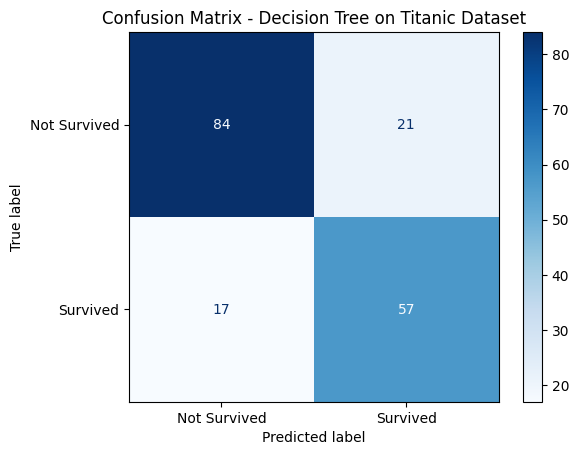

In [4]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

# Step 1: Load the Titanic dataset
df = sns.load_dataset('titanic')

# Step 2: Basic Preprocessing
# Drop columns not useful for prediction
df = df.drop(columns=['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'])

# Handle missing values
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop remaining rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Step 3: Feature and Target selection
X = df_encoded.drop(columns=['survived'])
y = df_encoded['survived']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

# Step 8: Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree on Titanic Dataset")
plt.show()
